<a href="https://colab.research.google.com/github/khaliil/Khaliil-Bouda-Analytics-Portfolio/blob/main/Sea_temperature_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sea Temperature Analysis

Khaliil Bouda

## Installing Modules

Installing the necessary Python libraries: 'netCDF4' for handling NetCDF files and 'Cartopy' for geospatial data plotting.

In [ ]:
!pip install netCDF4
!pip install cartopy


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 20.0 MB/s eta 0:00:00


## Importing Libraries


In [ ]:
import netCDF4 as nc
from google.colab import drive
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
import pandas as pd
import xarray as xr

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path = '/content/drive/MyDrive/Sustainability Analytics/Codes/NetCD Data/19820101000000-IFR-L3S_GHRSST-SSTfnd-ODYSSEA-GLO_MY_010_adjusted-v02.0-f01.0.nc'


In [ ]:
dataset = nc.Dataset(file_path, 'r') # 'r' is for read mode


## Data Exploration




In [ ]:
print(dataset)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    Conventions: CF-1.7,ACDD-1.3,ISO 8601
    standard_name_vocabulary: NCDF Climate and Forecast (CF) Metadata Convention version 1.7
    naming_authority: org.ghrsst
    netcdf_version_id: 4.6.1 of Sep  8 2018 17:21:01
    title: Merged collation of sea surface temperature from multiple satellite sources
    id: IFR-L3S-GLO-ODYSSEA
    cmems_product_id: SST_GLO_PHY_L3S_MY_010_039
    summary: Global multi-sensor composite on a 0.1 degree resolution grid
    references: Product User Manual for the global Level 3 ODYSSEA Sea Surface Temperature multi-year product, v1.0, Nov 2023
    metadata_link: 
    processing_level: L3S
    keywords: Oceans > Ocean Temperature > Sea Surface Temperature
    keywords_vocabulary: NASA Global Change Master Directory (GCMD) Science Keywords
    project: Copernicus - Marine environment monitoring service (CMEMS)
    program: GHRSST, CMEMS
    institution: Institut Franc

## Checking Variables and Dimensions


In [ ]:

print(dataset.variables.keys())
print(dataset.dimensions.keys())


dict_keys(['time', 'lat', 'lon', 'sst_dtime', 'sea_surface_temperature', 'adjusted_sea_surface_temperature', 'sses_bias', 'sses_standard_deviation', 'quality_level', 'sources_of_sst', 'bias_to_reference_sst'])
dict_keys(['time', 'lat', 'lon'])


For detailed information about each variable:

In [ ]:
# To get more detailed information about each variable
print("Variables and details:")
for var in dataset.variables:
    print(dataset.variables[var])
    print("Attributes:", dataset.variables[var].ncattrs())
    print()

Variables and details:
<class 'netCDF4._netCDF4.Variable'>
float64 time(time)
    long_name: reference time of sst field
    standard_name: time
    axis: T
    units: seconds since 1981-01-01 00:00:00
unlimited dimensions: 
current shape = (1,)
filling on, default _FillValue of 9.969209968386869e+36 used
Attributes: ['long_name', 'standard_name', 'axis', 'units']

<class 'netCDF4._netCDF4.Variable'>
float64 lat(lat)
    long_name: latitude
    standard_name: latitude
    axis: Y
    units: degrees_north
unlimited dimensions: 
current shape = (1600,)
filling on, default _FillValue of 9.969209968386869e+36 used
Attributes: ['long_name', 'standard_name', 'axis', 'units']

<class 'netCDF4._netCDF4.Variable'>
float64 lon(lon)
    long_name: longitude
    standard_name: longitude
    axis: X
    units: degrees_east
unlimited dimensions: 
current shape = (3600,)
filling on, default _FillValue of 9.969209968386869e+36 used
Attributes: ['long_name', 'standard_name', 'axis', 'units']

<class 'n

## Unit of Measurement is K (Kelvin)
0 ºC = 273.15 K = 32 ºF

26.85 ºC = 300 K = 80.33 ºF


## Accessing Variable Data


In [ ]:
latitudes = dataset.variables['lat'][:]
longitudes = dataset.variables['lon'][:]
print(f"Latitude ranges from {np.min(latitudes)} to {np.max(latitudes)} degrees")
print(f"Longitude ranges from {np.min(longitudes)} to {np.max(longitudes)} degrees")


Latitude ranges from -79.94999694824219 to 79.94999694824219 degrees
Longitude ranges from -179.9499969482422 to 179.9499969482422 degrees


We will remove time dimension as this dataset is from a single time point

In [ ]:
# Extracting sea surface temperature data and removing the time dimension
sea_surface_temperature = dataset.variables['sea_surface_temperature'][0, :, :]  # Removed time dimension here


## Data Visualization (EDA)




/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


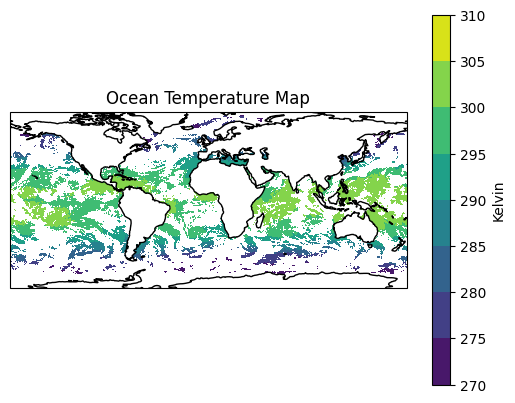

In [ ]:
# Create a map projection
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})

# Plot the data on a map using contourf
contour = ax.contourf(longitudes, latitudes, sea_surface_temperature, transform=ccrs.PlateCarree())
ax.coastlines()

# Add a colorbar
cbar = plt.colorbar(contour)
cbar.set_label('Kelvin')

plt.title('Ocean Temperature Map')
plt.show()

Now we can get the overview of our sea_surface_temperature.

## Cleaning and Analyzing Data


In [ ]:
# Creating a DataFrame from the temperature data

temperature_data = sea_surface_temperature.flatten()
df = pd.DataFrame({'Temperature': temperature_data})
print(df)

         Temperature
0                NaN
1                NaN
2                NaN
3                NaN
4                NaN
...              ...
5759995          NaN
5759996          NaN
5759997          NaN
5759998          NaN
5759999          NaN

[5760000 rows x 1 columns]


In [ ]:
df_cleaned = df.dropna()
print(df_cleaned)

         Temperature
469848        272.94
472121        271.65
472191        271.31
472193        271.61
472194        271.92
...              ...
5625165       272.81
5625166       272.31
5625167       272.36
5625169       271.60
5625296       273.91

[557436 rows x 1 columns]


One way to handle the NaN values is to dropping NaN values.
\
Let's use 'dropna' to clean the data.

Let's summarize the sea_surface_temperature by using .describe()

In [ ]:
summary_stats = df_cleaned['Temperature'].describe()

print(summary_stats)

count    557436.000000
mean        294.776745
std           7.503621
min         271.150000
25%         291.440000
50%         297.850000
75%         300.170000
max         305.330000
Name: Temperature, dtype: float64


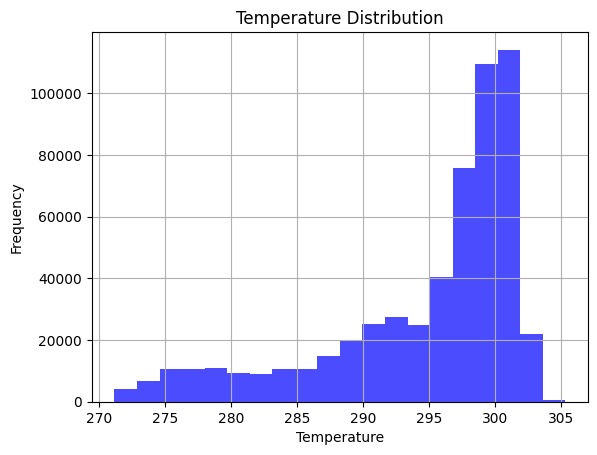

In [ ]:
# Histogram of temperatures
plt.hist(df['Temperature'], bins=20, alpha=0.7, color='blue')
plt.title('Temperature Distribution')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

## Aggregating Multiple Datasets
To conduct further analysis, we need to aggregate the data from multiple datasets.

Downloading Multiple Datasets


Setting the paths to each file.

In [ ]:

path_to_0101 = "/content/drive/MyDrive/Sustainability Analytics/Codes/NetCD Data/19820101000000-IFR-L3S_GHRSST-SSTfnd-ODYSSEA-GLO_MY_010_adjusted-v02.0-f01.0.nc"
path_to_0401 = '/content/drive/MyDrive/Sustainability Analytics/Codes/NetCD Data/19820401000000-IFR-L3S_GHRSST-SSTfnd-ODYSSEA-GLO_MY_010_adjusted-v02.0-f01.0.nc'
path_to_0701 = '/content/drive/MyDrive/Sustainability Analytics/Codes/NetCD Data/19820701000000-IFR-L3S_GHRSST-SSTfnd-ODYSSEA-GLO_MY_010_adjusted-v02.0-f01.0.nc'
path_to_1001 = '/content/drive/MyDrive/Sustainability Analytics/Codes/NetCD Data/19821001000000-IFR-L3S_GHRSST-SSTfnd-ODYSSEA-GLO_MY_010_adjusted-v02.0-f01.0.nc'



Loading each file with xarray

In [ ]:
# Load the NetCDF file
ds1 = xr.open_dataset(path_to_0101)
ds2 = xr.open_dataset(path_to_0401)
ds3 = xr.open_dataset(path_to_0701)
ds4 = xr.open_dataset(path_to_1001)

# Now you can access and explore the contents of the NetCDF file

### Combine the Datasets
Next, we'll combine these datasets into a single xarray.Dataset using the merge method. This assumes that the structure of each file is compatible (same dimensions and coordinates) for a straightforward merge.

In [ ]:
# Merge datasets
ds_combined = xr.merge([ds1, ds2, ds3, ds4])

In [ ]:
print(ds_combined)

<xarray.Dataset>
Dimensions:                           (time: 4, lat: 1600, lon: 3600)
Coordinates:
  * time                              (time) datetime64[ns] 1982-01-01T12:00:...
  * lat                               (lat) float64 -79.95 -79.85 ... 79.95
  * lon                               (lon) float64 -179.9 -179.9 ... 179.9
Data variables:
    sst_dtime                         (time, lat, lon) timedelta64[ns] NaT .....
    sea_surface_temperature           (time, lat, lon) float32 nan nan ... nan
    adjusted_sea_surface_temperature  (time, lat, lon) float32 nan nan ... nan
    sses_bias                         (time, lat, lon) float32 nan nan ... nan
    sses_standard_deviation           (time, lat, lon) float32 nan nan ... nan
    quality_level                     (time, lat, lon) float32 nan nan ... nan
    sources_of_sst                    (time, lat, lon) float32 nan nan ... nan
    bias_to_reference_sst             (time, lat, lon) float32 nan nan ... nan
Attributes: (12/6

## Clean and Prepare Data


In [ ]:
# Converting to pandas DataFrame
df_combined = ds_combined.to_dataframe().reset_index()
print(df_combined)

                        time        lat         lon sst_dtime  \
0        1982-01-01 12:00:00 -79.949997 -179.949997       NaT   
1        1982-01-01 12:00:00 -79.949997 -179.850006       NaT   
2        1982-01-01 12:00:00 -79.949997 -179.750000       NaT   
3        1982-01-01 12:00:00 -79.949997 -179.649994       NaT   
4        1982-01-01 12:00:00 -79.949997 -179.550003       NaT   
...                      ...        ...         ...       ...   
23039995 1982-10-01 12:00:00  79.949997  179.550003       NaT   
23039996 1982-10-01 12:00:00  79.949997  179.649994       NaT   
23039997 1982-10-01 12:00:00  79.949997  179.750000       NaT   
23039998 1982-10-01 12:00:00  79.949997  179.850006       NaT   
23039999 1982-10-01 12:00:00  79.949997  179.949997       NaT   

          sea_surface_temperature  adjusted_sea_surface_temperature  \
0                             NaN                               NaN   
1                             NaN                               NaN   
2     

In [ ]:
# Dropping rows with NaN values in the sea_surface_temperature column
df_cleaned = df_combined.dropna(subset=['sea_surface_temperature'])

# Selecting only the relevant columns
df_1982 = df_cleaned[['time', 'lat', 'lon', 'sea_surface_temperature']]

In [ ]:
print(df_1982)

                        time        lat         lon  sea_surface_temperature
469848   1982-01-01 12:00:00 -66.949997    4.850000               272.940002
472121   1982-01-01 12:00:00 -66.849998 -127.849998               271.649994
472191   1982-01-01 12:00:00 -66.849998 -120.849998               271.309998
472193   1982-01-01 12:00:00 -66.849998 -120.650002               271.609985
472194   1982-01-01 12:00:00 -66.849998 -120.550003               271.919983
...                      ...        ...         ...                      ...
23038259 1982-10-01 12:00:00  79.949997    5.950000               275.880005
23038260 1982-10-01 12:00:00  79.949997    6.050000               276.149994
23038265 1982-10-01 12:00:00  79.949997    6.550000               277.459991
23038349 1982-10-01 12:00:00  79.949997   14.950000               273.859985
23038350 1982-10-01 12:00:00  79.949997   15.050000               273.790009

[2230844 rows x 4 columns]


## Aggregated values - Average

Step 1: Preparing the DataFrame
First, ensure the time column is in the correct format and that the DataFrame is ready for aggregation.

In [ ]:
df_1982['time'] = pd.to_datetime(df_1982['time'])


<ipython-input-33-294483c6a4dd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1982['time'] = pd.to_datetime(df_1982['time'])


Step 2: Grouping by Quarter
Since your data points are already on the first day of each quarter, you can directly group by the time column to aggregate data by quarter without needing to change the frequency through resampling.

In [ ]:
# Extracting quarter from 'time', .dt accessor is used for panda series containing datetime values.
df_1982['quarter'] = df_1982['time'].dt.to_period('Q')
print(df_1982['quarter'])

469848      1982Q1
472121      1982Q1
472191      1982Q1
472193      1982Q1
472194      1982Q1
             ...  
23038259    1982Q4
23038260    1982Q4
23038265    1982Q4
23038349    1982Q4
23038350    1982Q4
Name: quarter, Length: 2230844, dtype: period[Q-DEC]


<ipython-input-34-4df2bef9cc34>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1982['quarter'] = df_1982['time'].dt.to_period('Q')


In [ ]:
# aggregating by quarter and find the average values. We can use mean
df_quarterly_avg_sst = df_1982.groupby('quarter')['sea_surface_temperature'].mean()

In [ ]:
print(df_quarterly_avg_sst)

quarter
1982Q1    294.776733
1982Q2    295.533905
1982Q3    295.085541
1982Q4    296.490936
Freq: Q-DEC, Name: sea_surface_temperature, dtype: float32


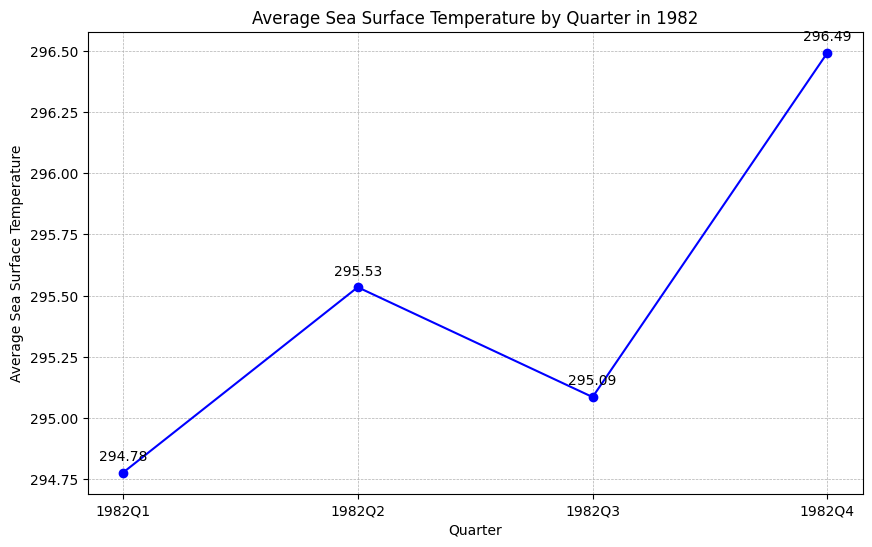

In [ ]:
# converting the 'quarter' index to string for better x-axis labeling
quarters = df_quarterly_avg_sst.index.astype(str)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(quarters, df_quarterly_avg_sst, marker='o', linestyle='-', color='b')

plt.title('Average Sea Surface Temperature by Quarter in 1982')
plt.xlabel('Quarter')
plt.ylabel('Average Sea Surface Temperature')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# adding text labels for each point
for i, temp in enumerate(df_quarterly_avg_sst):
    plt.text(quarters[i], temp + 0.05, f'{temp:.2f}', ha='center')

plt.show()

This result is counter intuitive, but we can assume this is because the dataset includes more sea data from the Sothern Hamisphere.

# Using Pivot table to Aggregate

In [ ]:
df_1982['time'] = pd.to_datetime(df_1982['time'])
df_1982['quarter'] = df_1982['time'].dt.to_period('Q')

<ipython-input-38-bbabe26e6a39>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1982['time'] = pd.to_datetime(df_1982['time'])
<ipython-input-38-bbabe26e6a39>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1982['quarter'] = df_1982['time'].dt.to_period('Q')


We will use .pivot_table to aggregate the average values from each coordinate.

In [ ]:
df_pivoted = df_1982.pivot_table(index=['lat', 'lon'], columns='quarter', values='sea_surface_temperature').reset_index()


In [ ]:
print(df_pivoted)

quarter        lat         lon  1982Q1      1982Q2  1982Q3      1982Q4
0       -70.550003 -138.949997     NaN  271.799988     NaN         NaN
1       -70.449997 -139.250000     NaN  271.759979     NaN         NaN
2       -70.449997 -139.050003     NaN  271.910004     NaN         NaN
3       -70.449997 -138.850006     NaN  271.739990     NaN         NaN
4       -70.449997 -138.649994     NaN  271.720001     NaN         NaN
...            ...         ...     ...         ...     ...         ...
1580933  79.949997    6.050000     NaN         NaN     NaN  276.149994
1580934  79.949997    6.550000     NaN         NaN     NaN  277.459991
1580935  79.949997    9.050000     NaN  273.839996     NaN         NaN
1580936  79.949997   14.950000     NaN         NaN     NaN  273.859985
1580937  79.949997   15.050000     NaN         NaN     NaN  273.790009

[1580938 rows x 6 columns]


Ensure all column names are in a consistent string format.

In [ ]:
df_pivoted.columns = [str(col) if isinstance(col, pd.Period) else col for col in df_pivoted.columns]



In [ ]:
# wea want to know the average value
df_pivoted['1982_Avg_Temp'] = df_pivoted[['1982Q1', '1982Q2', '1982Q3', '1982Q4']].mean(axis=1)


In [ ]:
print(df_pivoted)

               lat         lon  1982Q1      1982Q2  1982Q3      1982Q4  \
0       -70.550003 -138.949997     NaN  271.799988     NaN         NaN   
1       -70.449997 -139.250000     NaN  271.759979     NaN         NaN   
2       -70.449997 -139.050003     NaN  271.910004     NaN         NaN   
3       -70.449997 -138.850006     NaN  271.739990     NaN         NaN   
4       -70.449997 -138.649994     NaN  271.720001     NaN         NaN   
...            ...         ...     ...         ...     ...         ...   
1580933  79.949997    6.050000     NaN         NaN     NaN  276.149994   
1580934  79.949997    6.550000     NaN         NaN     NaN  277.459991   
1580935  79.949997    9.050000     NaN  273.839996     NaN         NaN   
1580936  79.949997   14.950000     NaN         NaN     NaN  273.859985   
1580937  79.949997   15.050000     NaN         NaN     NaN  273.790009   

         1982_Avg_Temp  
0           271.799988  
1           271.759979  
2           271.910004  
3          

We randomly 3 selected coordinates.

In [ ]:
# Selecting coordinates that have value in each df
sample_coordinates = [
    (-53.95, -35.25),
    (-51.75, -68.25),
    (54.85, 4.55)
]
quarters = ['1982Q1', '1982Q2', '1982Q3', '1982Q4']


Let's compare the yearly temperature change of 3 coordinate points.

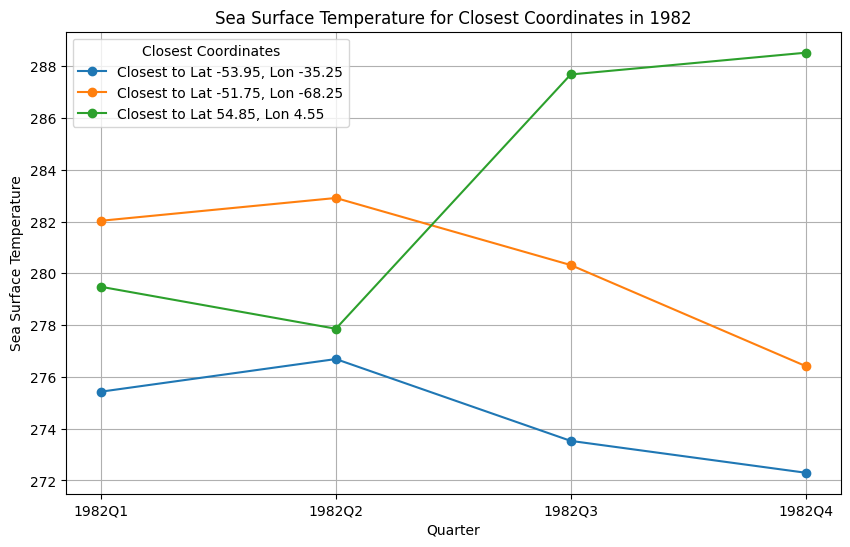

In [ ]:
# Setting up the plot
plt.figure(figsize=(10, 6))

# Plotting data for the closest set of coordinates
for lat, lon in sample_coordinates:
    # Calculating the absolute difference from the sample coordinates
    lat_diff = np.abs(df_pivoted['lat'] - lat)
    lon_diff = np.abs(df_pivoted['lon'] - lon)

    # Finding the index of the smallest total difference
    closest_idx = (lat_diff + lon_diff).idxmin()

    # Extracting the closest row
    closest_row = df_pivoted.loc[closest_idx]

    # Extracting the sea surface temperature for all quarters
    temperatures = closest_row[quarters].values

    # Plot
    plt.plot(quarters, temperatures, marker='o', label=f'Closest to Lat {lat}, Lon {lon}')

# Customize the plot
plt.title('Sea Surface Temperature for Closest Coordinates in 1982')
plt.xlabel('Quarter')
plt.ylabel('Sea Surface Temperature')
plt.legend(title="Closest Coordinates")
plt.grid(True)

plt.show()

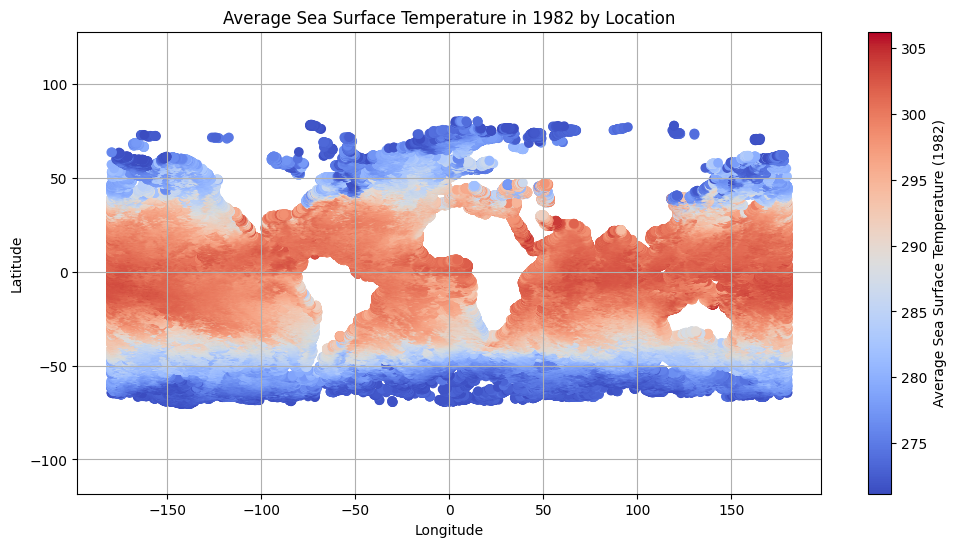

In [ ]:
plt.figure(figsize=(12, 6))

# The 'c' argument specifies the colors of the points, which we set to the average temperature
# 'cmap' specifies the colormap used to map scalar data to colors
scatter = plt.scatter(df_pivoted['lon'], df_pivoted['lat'], c=df_pivoted['1982_Avg_Temp'], cmap='coolwarm', marker='o')

# Adding a colorbar to the plot, which indicates the temperature scale
plt.colorbar(scatter, label='Average Sea Surface Temperature (1982)')

# Set plot labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Average Sea Surface Temperature in 1982 by Location')
plt.grid(True)

# setting the aspect ratio to equal to ensure that one unit in x is equal to one unit in y
plt.axis('equal')

# Showing the plot
plt.show()

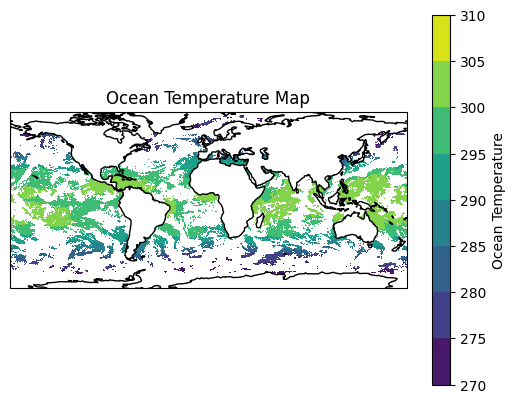

In [ ]:
# Extracting latitude and longitude variables
lat = dataset.variables['lat']
lon = dataset.variables['lon']

# Extracting the data variable
data = dataset.variables['sea_surface_temperature']

# Creating a map projection
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})

# Plotting the data on a map using contourf
contour = ax.contourf(lon[:], lat[:], data[0, :, :], transform=ccrs.PlateCarree())
ax.coastlines()

# Adding a colorbar
cbar = plt.colorbar(contour)
cbar.set_label('Ocean Temperature')

plt.title('Ocean Temperature Map')
plt.show()